## Final Project Submission

Please fill out:
* Student name: Jeffrey Soto
* Student pace: Self Paced 
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: https://anonymousodyssey19.github.io/module_5_project_classifaction


For my classification project I chose to create a model that is able to predict credit card fraud based on 29 datapoints that were collected and provided in this dataset. Obviously in the case of credit card fraud, I wanted to get as high of accuracy as possible without overfitting the model and it becoming useless when put out into the real world. So that is what I set out to achieve, a model that is able to predict credit card fraud with the highest degree of accuracy. 

---------------------------------------------------------------------------------------------------------------------

Here is my final model showing the accuracy I was able to achieve. The results are from a dataset that was a completely different dataset than was used to train and test the model. I elected to not clean the data for this test to see how the model would handle any sort of unexpected values, although the dataframe was very clean to begin with. 

In [27]:
clf = AdaBoostClassifier(n_estimators=50, learning_rate= 1.0)
clf.fit(X_train, y_train)

XX = df1.iloc[5001:15000, :-1]
yy = df1.iloc[5001:15000, -1]

vval_preds = clf.predict(XX)
vval_accuracy = accuracy_score(yy, vval_preds)
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Validation accuracy: 100.0%


---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [34]:
df1 = pd.read_csv('creditcard.csv')
df = df1.iloc[:5000,:]
df1.shape

(284807, 31)

Here I am looking at the database for to get a better understanding of the values being used.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here I am going through all the columns and making sure that there are no null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
Time      5000 non-null float64
V1        5000 non-null float64
V2        5000 non-null float64
V3        5000 non-null float64
V4        5000 non-null float64
V5        5000 non-null float64
V6        5000 non-null float64
V7        5000 non-null float64
V8        5000 non-null float64
V9        5000 non-null float64
V10       5000 non-null float64
V11       5000 non-null float64
V12       5000 non-null float64
V13       5000 non-null float64
V14       5000 non-null float64
V15       5000 non-null float64
V16       5000 non-null float64
V17       5000 non-null float64
V18       5000 non-null float64
V19       5000 non-null float64
V20       5000 non-null float64
V21       5000 non-null float64
V22       5000 non-null float64
V23       5000 non-null float64
V24       5000 non-null float64
V25       5000 non-null float64
V26       5000 non-null float64
V27       5000 non-null float

In [7]:
df.Class.value_counts(normalize=True)

0    0.9994
1    0.0006
Name: Class, dtype: float64

A further inspection into the data and the values that are in the dataframe. It appears that almost all the columns are very small values, indicating that the values were already normalized or modified by the company providing the credit card data to preserve anonymity.

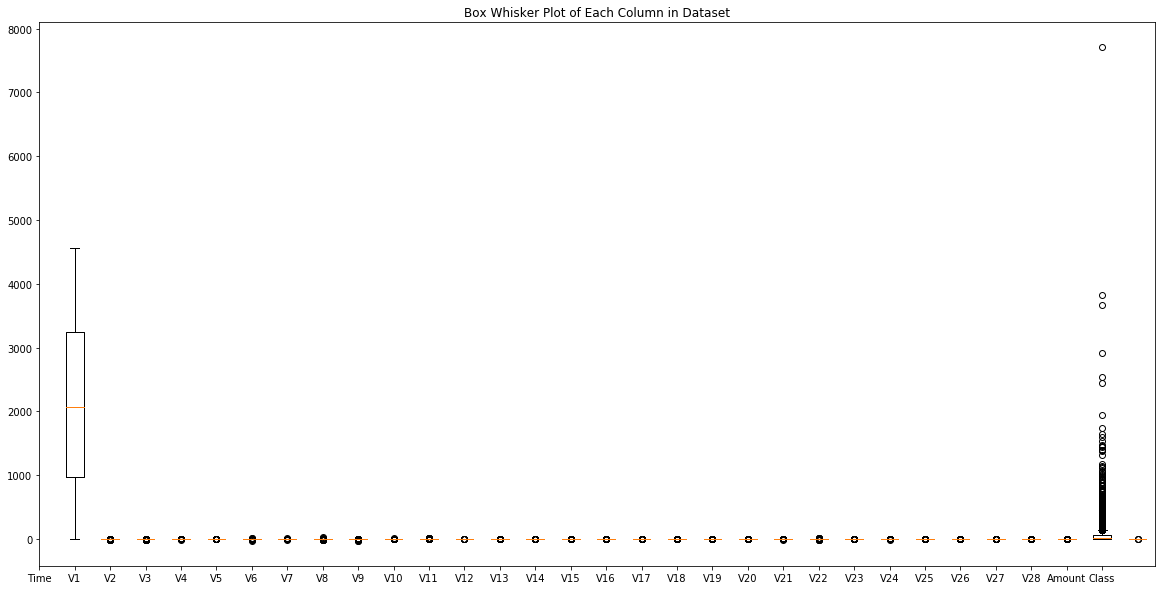

In [8]:
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box Whisker Plot of Each Column in Dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show();

Below I check for any columns that are over correlated using a heatmap from seaborn. Which shows that all values tend to be independent and no removal of columns is necessary.

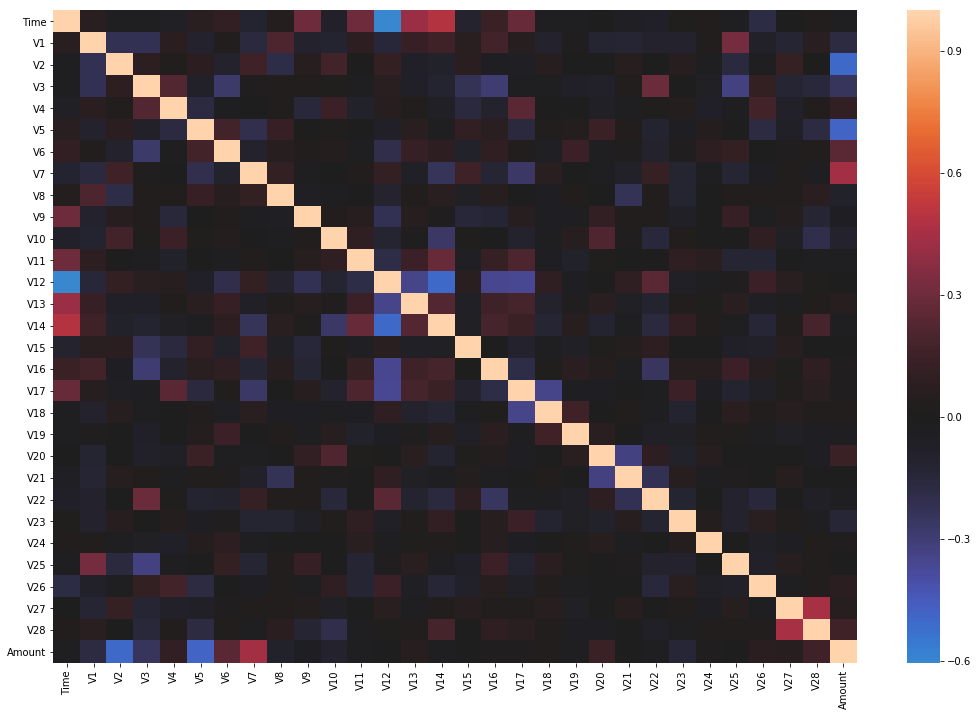

In [11]:
import seaborn as sns
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(), center=0);

Below I am seperating the values into the features and the target.

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Below I am running a few PCA tests to see if and to what degree I need demensionality reduction. Given the results, I am not seeing much difference from using only one feature as apposed to all 29.

In [12]:
pca_1 = PCA(n_components=1)
pca_2 = PCA(n_components=10)
pca_3 = PCA(n_components=25)

principalComponents = pca_1.fit_transform(X)
principalComponents = pca_2.fit_transform(X)
principalComponents = pca_3.fit_transform(X)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=29)
principalComponents = pca.fit_transform(X)
print(np.sum(pca.explained_variance_ratio_))

0.9777960293483089
0.9999951814188761
0.9999998177198257
0.9999999919925556


Here I am creating a baseline for my decision tree classifier before pruning. The results indicate that there definitely needs to be pruning.

In [13]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X, y, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 67.84%


Using gridsearch I am checking for the best parameters are going to provide the best results.

In [14]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, return_train_score=True)
dt_grid_search.fit(X, y)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Optimal Parameters: {}".format(dt_grid_search.best_params_))

Mean Training Score: 99.95%
Mean Testing Score: 99.94%
Optimal Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}


Here I am repeating the above process but for the random forest model although the baseline has very high predictive qualities it can be misleading as so few transactions are fraudulent.

In [15]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X, y, cv=5))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

Mean Cross Validation Score for Random Forest Classifier: 99.94%


As you can see the model did not increase the performance of the model, although it is nice to know which parameters are best for this model so that I can provide consistent results.

In [16]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 6, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 2, 5]}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5)
rf_grid_search.fit(X, y)
rf_grid_testing_score = rf_grid_search.score(X, y)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Mean Testing Score: {:.4}%".format(rf_grid_testing_score * 100))
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 99.94%
Mean Testing Score: 99.96%
Optimal Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


Here I perform one last iteration with the Adaboost model and am able to see the performance increase to 100% which is promising as there is only fraudulent activity .06% of the time in this data.

In [17]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X, y, cv=5))

print("Mean Cross Validation Score for AdaBoost: {:.4}%".format(adaboost_mean_cv_score * 100))

Mean Cross Validation Score for AdaBoost: 83.8%


In [18]:
adaboost_param_grid = {'n_estimators': [50, 100, 250], 'learning_rate': [1.0, 0.5, 0.1]}

adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=5)
adaboost_grid_search.fit(X, y)
adaboost_grid_testing_score = adaboost_grid_search.score(X, y)

print("Testing Accuracy: {:.4}%".format(adaboost_grid_search.best_score_ * 100))
print("Mean Testing Score: {:.4}%".format(adaboost_grid_testing_score * 100))
print("Optimal Parameters: {}".format(adaboost_grid_search.best_params_))

Testing Accuracy: 83.78%
Mean Testing Score: 100.0%
Optimal Parameters: {'learning_rate': 1.0, 'n_estimators': 50}


Here I am performaing a train test split for further analysis.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

I decide to use the AdaBoost model with the optimal parameters. Given the small percentage of fraudulent charges the weighted model is the only one that is able to predict those few transaction accurately.

In [20]:
clf = AdaBoostClassifier(n_estimators=50, learning_rate= 1.0)

clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 100.0%


Here I am checking the reliability of the model by running through data that was not cleaned or part of the previous database that the model was trained/tested on. The accuracy is very impressive although there was not a significant drop in accuracy which shows that the model was trained well and is not overfitting and is handling any values that were not cleaned very well.

In [33]:
df2 = df1.iloc[5001:15000,:]
df2.Class.value_counts(normalize=True)

0    0.994199
1    0.005801
Name: Class, dtype: float64

In [35]:
XX = df1.iloc[125001:135000, :-1]
yy = df1.iloc[125001:135000, -1]

vval_preds = clf.predict(XX)
vval_accuracy = accuracy_score(yy, vval_preds)
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Validation accuracy: 100.0%
